MACHINE LEARNING MODELS
THIS NOTEBBOK HAS ML MODELS:-
KMeans
Decision Tree

K MEANS

In [ ]:
!pip3 install scikeras

In [ ]:
# Core Libraries
import numpy as np
import pandas as pd
import joblib
import matplotlib.cm as cm
import matplotlib.pyplot as plt

# Machine Learning Models
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, StratifiedKFold, cross_val_score

# Deep Learning (ANN)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasClassifier

# Metrics and Evaluation
from sklearn.metrics import (
    confusion_matrix,
    balanced_accuracy_score,
    classification_report,
    cohen_kappa_score,
    f1_score,
    precision_score,
    recall_score,
    roc_curve,
    auc
)

# Yellowbrick Visualizations
from yellowbrick.target import FeatureCorrelation
from yellowbrick.features import rank2d, RadViz, Rank2D
from yellowbrick.classifier import (
    DiscriminationThreshold,
    PrecisionRecallCurve,
    ROCAUC,
    ClassificationReport,
    ClassPredictionError,
    ConfusionMatrix
)
from yellowbrick.model_selection import (
    feature_importances,
    CVScores,
    RFECV,
    FeatureImportances,
    LearningCurve,
    ValidationCurve
)


In [ ]:
df = pd.read_csv("/content/cleanedcumalative.csv")
df.drop(columns = ["Unnamed: 0"], inplace=True)
print(df.shape)
df.head()

(9110, 47)


,rowid,kepid,kepoi_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,1,10797460,K00752.01,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,2,10797460,K00752.02,CONFIRMED,CANDIDATE,0.969,0,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,3,10811496,K00753.01,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,4,10848459,K00754.01,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,5,10854555,K00755.01,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


In [ ]:
ALL_COLUMNS = df.columns
ERROR_COLUMNS = [col for col in ALL_COLUMNS if "err" in col]
EXCLUDE = ["rowid", "kepid", "kepoi_name", "koi_score", "koi_disposition", "koi_pdisposition", "koi_tce_delivname", "koi_tce_plnt_num"] + ERROR_COLUMNS
TO_USE = list(set(ALL_COLUMNS) - set(EXCLUDE))

In [ ]:
print(f"Columns being analysed: {len(TO_USE)}")
df[TO_USE].head()


Columns being analysed: 19


,koi_fpflag_ss,koi_steff,koi_insol,ra,koi_kepmag,dec,koi_fpflag_co,koi_period,koi_time0bk,koi_prad,koi_model_snr,koi_depth,koi_duration,koi_teq,koi_srad,koi_slogg,koi_impact,koi_fpflag_ec,koi_fpflag_nt
0,0,5455.0,93.59,291.93423,15.347,48.141651,0,9.488036,170.538750,2.26,35.8,615.8,2.95750,793.0,0.927,4.467,0.146,0,0
1,0,5455.0,9.11,291.93423,15.347,48.141651,0,54.418383,162.513840,2.83,25.8,874.8,4.50700,443.0,0.927,4.467,0.586,0,0
2,1,5853.0,39.30,297.00482,15.436,48.134129,0,19.899140,175.850252,14.60,76.3,10829.0,1.78220,638.0,0.868,4.544,0.969,0,0
3,1,5805.0,891.96,285.53461,15.597,48.285210,0,1.736952,170.307565,33.46,505.6,8079.2,2.40641,1395.0,0.791,4.564,1.276,0,0
4,0,6031.0,926.16,288.75488,15.509,48.226200,0,2.525592,171.595550,2.75,40.9,603.3,1.65450,1406.0,1.046,4.438,0.701,0,0


In [ ]:
np.unique(df["koi_disposition"].values)

array(['CANDIDATE', 'CONFIRMED', 'FALSE POSITIVE'], dtype=object)

In [ ]:
subset_df = df[df["koi_disposition"] != "CANDIDATE"]
print(subset_df.shape)
subset_df.head()

(6939, 47)


,rowid,kepid,kepoi_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,1,10797460,K00752.01,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,2,10797460,K00752.02,CONFIRMED,CANDIDATE,0.969,0,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,3,10811496,K00753.01,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,4,10848459,K00754.01,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,5,10854555,K00755.01,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


In [ ]:
X = subset_df[TO_USE].values
y = subset_df["koi_disposition"].apply(lambda x: x=='CONFIRMED').astype(int).values

In [ ]:
subset_df["koi_disposition"].value_counts()

,count
koi_disposition,
FALSE POSITIVE,4647
CONFIRMED,2292


In [ ]:
def getVisualisationPCA(X, y):
    x_scaled = StandardScaler().fit_transform(X)
    pca = PCA(n_components=2)
    principal_components = pca.fit_transform(x_scaled)

    pca_df = pd.DataFrame(
        data=principal_components,
        columns=['principal component 1', 'principal component 2']
    )
    pca_df["TARGET"] = ["CONFIRMED" if label == 1 else "FALSE POSITIVE" for label in y]

    colors = cm.rainbow(np.linspace(0, 1, 2))
    plt.figure(figsize=(8, 6))
    for label, color in zip(["FALSE POSITIVE", "CONFIRMED"], colors):
        indicesToKeep = pca_df['TARGET'] == label
        plt.scatter(
            pca_df.loc[indicesToKeep, 'principal component 1'],
            pca_df.loc[indicesToKeep, 'principal component 2'],
            color=color, label=label
        )

    plt.title("PCA Visualization")
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.legend()
    plt.grid()
    plt.savefig("pca.png", dpi=600)
    plt.show()


In [ ]:
def getVarianceContribution(X):
    x_scaled = StandardScaler().fit_transform(X)
    pca = PCA().fit(x_scaled)
    variance = pca.explained_variance_ratio_

    plt.figure(figsize=(8, 5))
    plt.bar(range(1, len(variance) + 1), variance, alpha=0.6)
    plt.xlabel('Principal Components')
    plt.ylabel('Explained Variance Ratio')
    plt.title('Variance Contribution per Component')
    plt.grid()
    plt.savefig("variance.png", dpi=600)
    plt.show()


In [ ]:
def getFeatureCorrelation(X, y, feature_names):
    visualizer = FeatureCorrelation(labels=feature_names)
    visualizer.fit(X, y)
    visualizer.show(outpath="correlation.png", dpi=600)


In [ ]:
def getPearsonRanking(X, y, feature_names):
    visualizer = Rank2D(algorithm='pearson', features=feature_names)
    visualizer.fit(X, y)
    visualizer.transform(X)
    visualizer.show(outpath="pearson_ranking.png", dpi=600)


In [ ]:
def getRadialViz(X, y, feature_names):
    visualizer = RadViz(classes=["FALSE POSITIVE", "CONFIRMED"], features=feature_names)
    visualizer.fit(X, y)
    visualizer.transform(X)
    visualizer.show(outpath="radial.png", dpi=600)


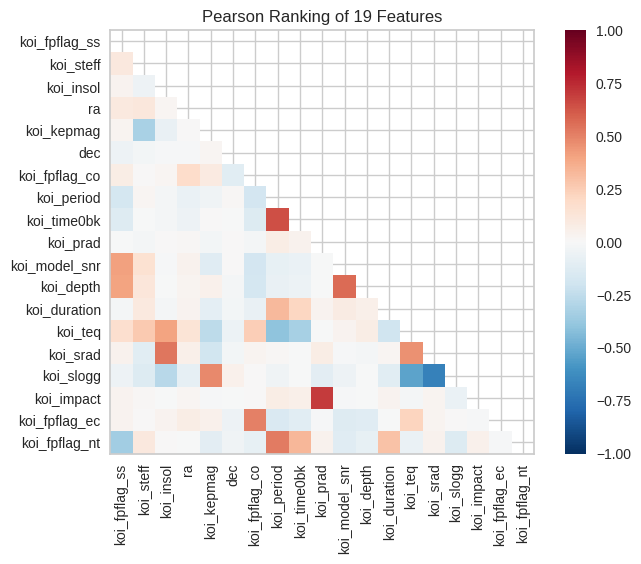

In [ ]:
# Assuming you have already defined X, y, and TO_USE
getPearsonRanking(X, y, TO_USE)


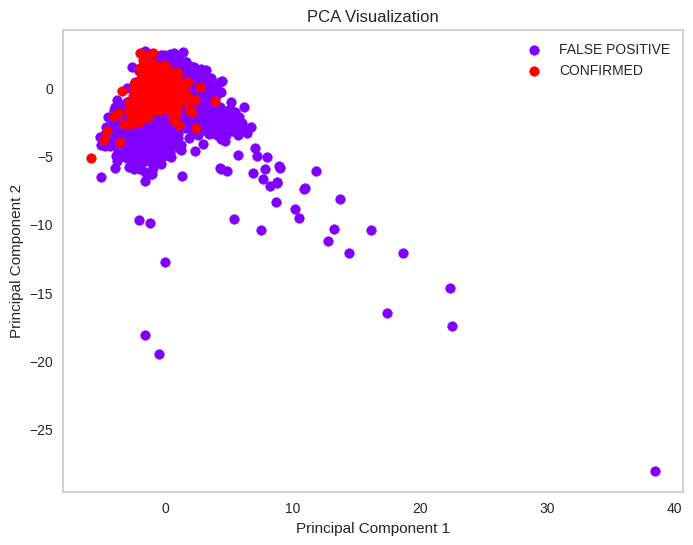

In [ ]:
# PCA Visualization
getVisualisationPCA(X, y)


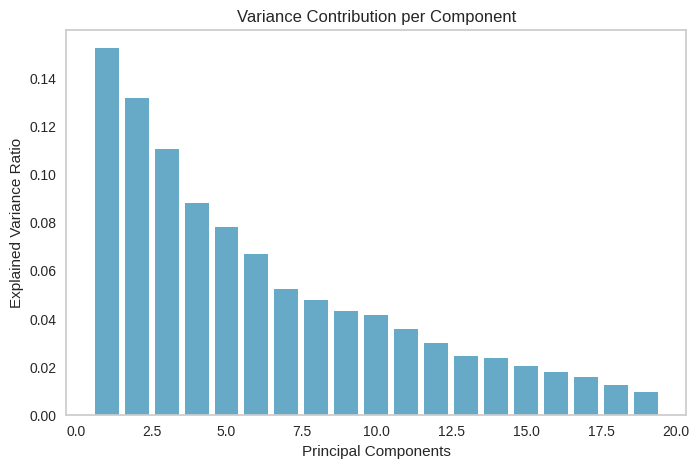

In [ ]:
# Variance Contribution
getVarianceContribution(X)


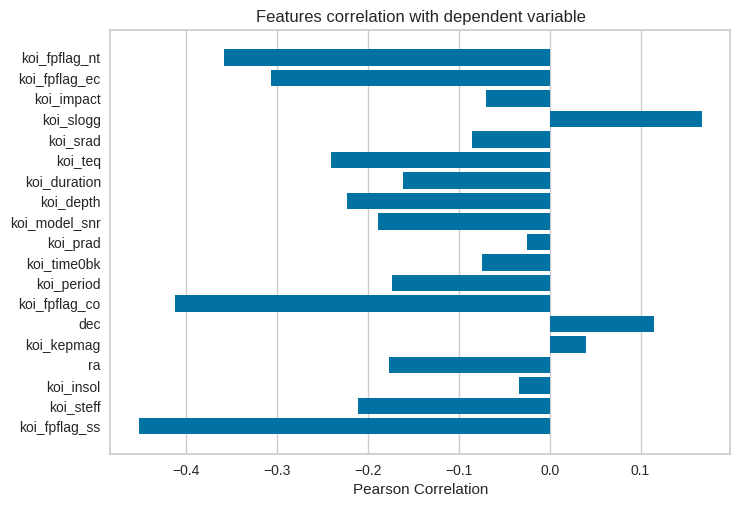

In [ ]:
# Feature Correlation Heatmap
getFeatureCorrelation(X, y, TO_USE)

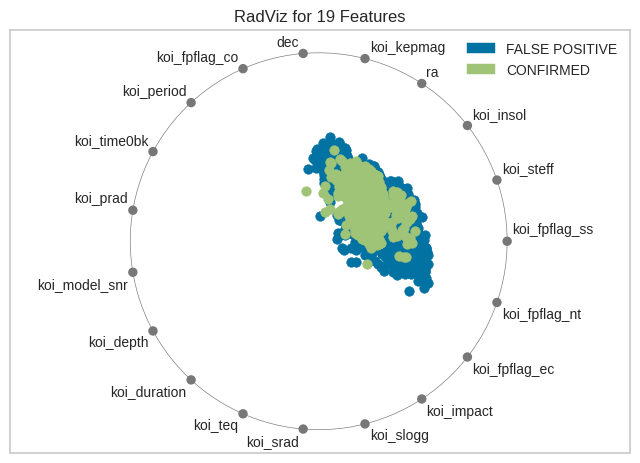

In [ ]:
# Radial Visualization
getRadialViz(X, y, TO_USE)

In [ ]:
X = StandardScaler().fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0, stratify=y)


In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4649, 19), (2290, 19), (4649,), (2290,))

In [ ]:
def performance(test, pred):
    conf_matrix = confusion_matrix(test, pred)
    f1 = f1_score(test, pred)
    report = classification_report(test, pred)
    accuracy = balanced_accuracy_score(test, pred)
    kappa = cohen_kappa_score(test, pred)
    print(f"F1 Score: {f1}")
    print(f"Kappa Score: {kappa}")
    print(f"Accuracy Score: {accuracy}")
    print(f"Confusion Matrix:\n{conf_matrix}")
    print(report)

In [ ]:
def crossValidationCheck(classifier, X, y, K=10):
    print("Checking Cross Validation Score...\n")

    cv = KFold(n_splits=K, shuffle=True, random_state=1)
    scores = cross_val_score(classifier, X, y, scoring='f1', cv=cv, n_jobs=-1)
    print(f"Average F1 score over {K}-Folds: {scores.mean()}")

    visualizer = CVScores(classifier, cv=cv, scoring='f1')
    visualizer.fit(X, y)
    visualizer.show()

    visualizer = LearningCurve(classifier, cv=cv, scoring='f1', n_jobs=-1)
    visualizer.fit(X, y)
    visualizer.show()

    cv_strat = StratifiedKFold(n_splits=K, shuffle=True, random_state=1)
    scores_strat = cross_val_score(classifier, X, y, scoring='f1', cv=cv_strat, n_jobs=-1)
    print(f"Average F1 score over Stratified {K}-Folds: {scores_strat.mean()}")

    visualizer = CVScores(classifier, cv=cv_strat, scoring='f1')
    visualizer.fit(X, y)
    visualizer.show()

    visualizer = LearningCurve(classifier, cv=cv_strat, scoring='f1', n_jobs=-1)
    visualizer.fit(X, y)
    visualizer.show()

In [ ]:
# --- Feature Importance ---
def getFeatureImportance(model, X, y, feature_names):
    viz = FeatureImportances(model, labels=feature_names)
    viz.fit(X, y)
    viz.show()


In [ ]:
# --- Class Prediction Error ---
def getClassPredictionError(classifier):
    visualizer = ClassPredictionError(classifier, classes=["FALSE POSITIVE", "CONFIRMED"])
    visualizer.fit(X_train, y_train)
    visualizer.score(X_test, y_test)
    visualizer.show()

# --- Classification Report ---
def getClassificationReport(classifier):
    visualizer = ClassificationReport(classifier, classes=["FALSE POSITIVE", "CONFIRMED"])
    visualizer.fit(X_train, y_train)
    visualizer.score(X_test, y_test)
    visualizer.show()

# --- Discrimination Threshold ---
def getDiscriminationThreshold(classifier):
    visualizer = DiscriminationThreshold(classifier)
    visualizer.fit(X_train, y_train)
    visualizer.show()

# --- Precision Recall ---
def getPrecisionRecall(classifier):
    visualizer = PrecisionRecallCurve(classifier)
    visualizer.fit(X_train, y_train)
    visualizer.score(X_test, y_test)
    visualizer.show()

# --- ROC Curve ---
def rocCurve(classifier):
    visualizer = ROCAUC(classifier, classes=["FALSE POSITIVE", "CONFIRMED"])
    visualizer.fit(X_train, y_train)
    visualizer.score(X_test, y_test)
    visualizer.show()

In [ ]:
# --- Recursive Feature Elimination ---
def getFeatureElimination(classifier, X, y):
    visualizer = RFECV(classifier)
    visualizer.fit(X, y)
    visualizer.show()


In [ ]:
# --- Save and Load Model ---
def saveModel(model, filename):
    joblib.dump(model, filename)

def loadModel(filename):
    return joblib.load(filename)

KMeans Model

In [ ]:
from sklearn.cluster import KMeans

# Initialize KMeans (2 clusters: Confirmed vs False Positive)
classifier = KMeans(n_clusters=2, random_state=0, n_init='auto')

# Fit model
classifier.fit(X_train)

# Predict labels
pred = classifier.predict(X_test)


In [ ]:
performance(y_test, pred)


F1 Score: 0.009652509652509652
Kappa Score: -0.20546103802819782
Accuracy Score: 0.4136719369770217
Confusion Matrix:
[[1259  275]
 [ 751    5]]
              precision    recall  f1-score   support

           0       0.63      0.82      0.71      1534
           1       0.02      0.01      0.01       756

    accuracy                           0.55      2290
   macro avg       0.32      0.41      0.36      2290
weighted avg       0.43      0.55      0.48      2290



In [ ]:
classifier

KMeans(n_clusters=2, random_state=0)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import classification_report

def getClassificationReport_kmeans(classifier, X_test, y_test):
    # Predict the cluster labels
    pred = classifier.predict(X_test)

    # Map clusters manually if needed (optional based on data)
    pred = pd.Series(pred)

    # Prepare classification report
    report_dict = classification_report(y_test, pred, output_dict=True, zero_division=0)
    df_report = pd.DataFrame(report_dict).transpose()

    # Automatically pick the correct labels based on existing
    label_names = df_report.index.tolist()[:2]  # pick first two rows only

    df_plot = df_report.loc[label_names, ["precision", "recall", "f1-score"]]

    # Rename according to labels (if you want, otherwise just 0/1)
    df_plot.index = ["FALSE POSITIVE", "CONFIRMED"]

    # Plot
    plt.figure(figsize=(6, 4))
    # Change 'darkred' to a valid colormap name like 'Reds'
    sns.heatmap(df_plot, annot=True, cmap="Reds", fmt=".3f", linewidths=0.5)
    plt.title(f"{classifier.__class__.__name__} Classification Report")
    plt.xlabel("Metric")
    plt.ylabel("Class")
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

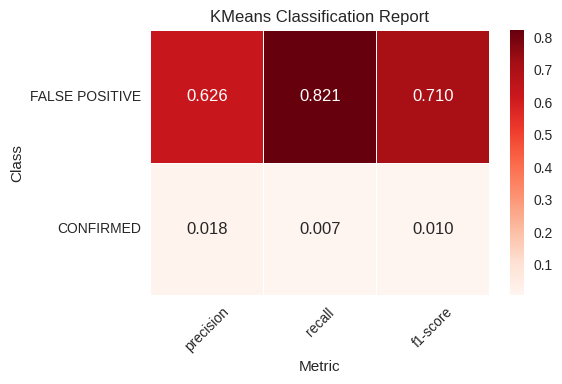

In [ ]:
getClassificationReport_kmeans(classifier, X_test, y_test)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import classification_report

def getClassificationReport_kmeans(classifier, X_test, y_test):
    y_pred = classifier.predict(X_test)

    # Generate classification report dictionary
    report_dict = classification_report(y_test, y_pred, output_dict=True)
    df_report = pd.DataFrame(report_dict).transpose()

    # Only keep 0 and 1 classes
    df_plot = df_report.loc[['0', '1'], ['precision', 'recall', 'f1-score']]

    # Rename rows for better labels
    df_plot.index = ['FALSE POSITIVE', 'CONFIRMED']

    plt.figure(figsize=(7, 5))
    ax = sns.heatmap(df_plot, annot=True, cmap="Reds", vmin=0, vmax=1, fmt=".3f", linewidths=0.5)

    # Annotate with a custom title
    plt.title("KMeans Classification Report" , fontsize=14, color='red')
    plt.xlabel("Metric", fontsize=12)
    plt.ylabel("Class", fontsize=12)

    plt.show()


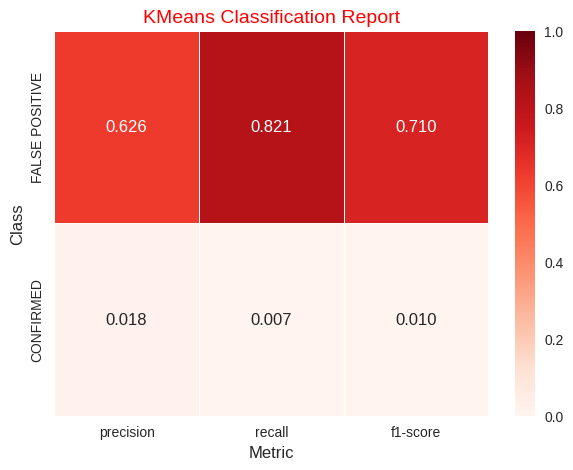

In [ ]:
getClassificationReport_kmeans(classifier, X_test, y_test)


for threshold we cant use ut as No, we cannot directly use getDiscriminationThreshold for KMeans.

Why?
getDiscriminationThreshold works for probabilistic classifiers — those that output a probability (like SVM, Logistic Regression, Naive Bayes, etc.).

KMeans is a clustering algorithm, not a classifier. It assigns clusters (0, 1, etc.) but it doesn’t output probabilities between 0 and 1 for prediction confidence.

So, there’s no discrimination threshold to adjust in KMeans — it’s a hard cluster assignment only.



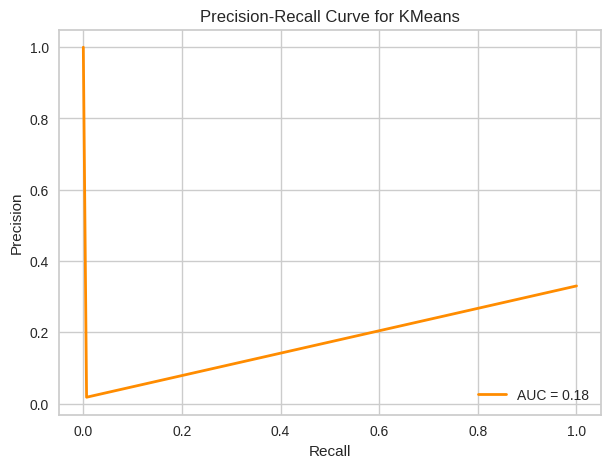

In [ ]:
# Instead of using getPrecisionRecall, you'll need a different approach.
# Since KMeans doesn't give probabilities, you can't directly
# create a Precision-Recall curve. Here's an alternative:

from sklearn.metrics import precision_recall_curve, auc

# Get predicted cluster labels
y_pred = classifier.predict(X_test)

# Assuming cluster 1 represents 'CONFIRMED' (adjust if needed)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
pr_auc = auc(recall, precision)

# Plot the Precision-Recall curve
plt.figure(figsize=(7, 5))
plt.plot(recall, precision, color='darkorange', lw=2, label=f'AUC = {pr_auc:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for KMeans')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
import matplotlib.pyplot as plt
import numpy as np

def kmeansCrossValidationPlot(classifier, X, y, K=10):
    cv = KFold(n_splits=K, shuffle=True, random_state=42)

    # Because KMeans is unsupervised, we need to score manually
    scores = []
    for train_idx, test_idx in cv.split(X):
        X_train_fold, X_test_fold = X[train_idx], X[test_idx]
        y_train_fold, y_test_fold = y[train_idx], y[test_idx]

        # Fit KMeans on the training fold
        classifier.fit(X_train_fold)
        pred = classifier.predict(X_test_fold)

        # Optional: Flip predictions to match true labels
        from sklearn.metrics import confusion_matrix, f1_score
        cm = confusion_matrix(y_test_fold, pred)
        if cm[0,0] + cm[1,1] < cm[0,1] + cm[1,0]:
            pred = 1 - pred

        # Calculate F1 score manually
        scores.append(f1_score(y_test_fold, pred))

    print(f"Average F1 score over {K}-Folds: {np.mean(scores):.6f}")

    # Plot
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, K+1), scores, marker='o', linestyle='-', color='blue', label='F1 Score per Fold')
    plt.axhline(y=np.mean(scores), color='red', linestyle='--', label=f'Mean F1 = {np.mean(scores):.3f}')
    plt.xticks(range(1, K+1))
    plt.ylim(0.5, 1.05)
    plt.xlabel('Fold Number')
    plt.ylabel('F1 Score')
    plt.title('Cross Validation F1 Scores (KMeans)')
    plt.legend()
    plt.grid(True)
    plt.show()


Average F1 score over 10-Folds: 0.216028


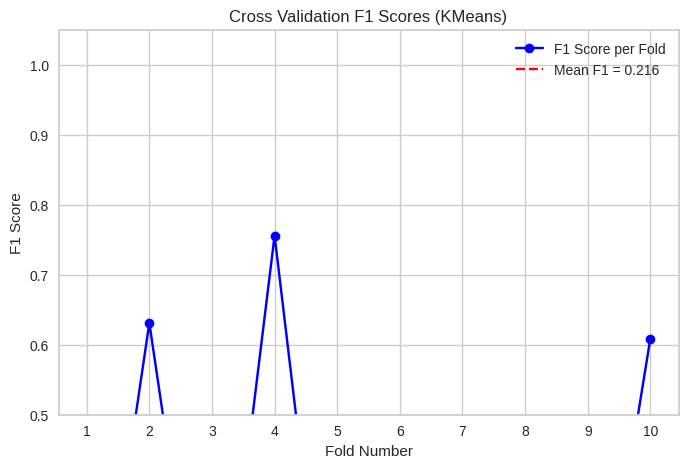

In [ ]:
from sklearn.cluster import KMeans

# Step 1: Initialize KMeans
classifier = KMeans(n_clusters=2, random_state=0, n_init='auto')

# Step 2: Fit KMeans on X_train
classifier.fit(X_train)

# Step 3: Plot KMeans Cross Validation
kmeansCrossValidationPlot(classifier, X, y, K=10)


For hyper parameter tuning You are tuning cluster quality, NOT prediction accuracy.
Yes, we can do hyperparameter tuning for KMeans clustering,
but it's different from tuning supervised models like SVM, Random Forest, etc.



DECISION TREE

In [ ]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(
    criterion='entropy',         # switch criterion
    max_depth=2,                 # even shallower tree
    min_samples_split=100,       # HUGE splits needed
    min_samples_leaf=50,         # HUGE leaves
    random_state=42
)

classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)

performance(y_test, pred)


F1 Score: 0.7805133577789418
Kappa Score: 0.6349277130162229
Accuracy Score: 0.8597392093154805
Confusion Matrix:
[[1126  408]
 [  11  745]]
              precision    recall  f1-score   support

           0       0.99      0.73      0.84      1534
           1       0.65      0.99      0.78       756

    accuracy                           0.82      2290
   macro avg       0.82      0.86      0.81      2290
weighted avg       0.88      0.82      0.82      2290



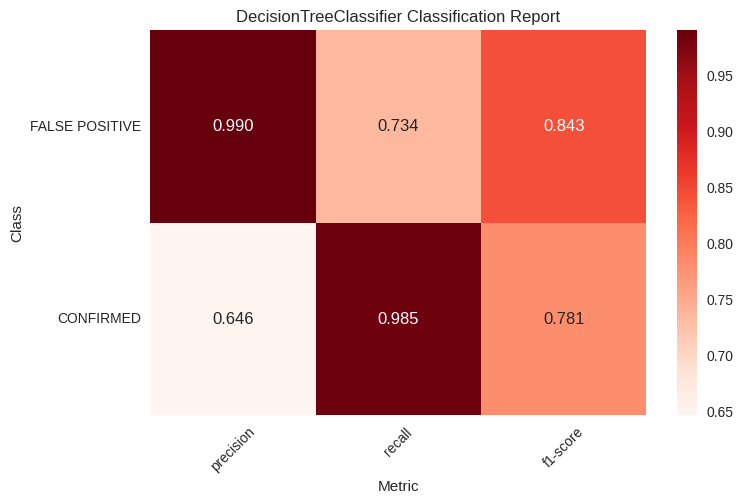

In [ ]:
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Get prediction report
report = classification_report(y_test, pred, output_dict=True)

# Step 2: Convert to DataFrame
report_df = pd.DataFrame(report).transpose()

# Step 3: Keep only precision, recall, f1-score (remove support etc.)
metrics_to_keep = ['precision', 'recall', 'f1-score']
# Change here: Use '0' and '1' as index instead of 0 and 1
heatmap_data = report_df.loc[['0', '1'], metrics_to_keep]  # '0': FALSE POSITIVE, '1': CONFIRMED

# Step 4: Rename classes for readability
heatmap_data.index = ['FALSE POSITIVE', 'CONFIRMED']

# Step 5: Plot Heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(heatmap_data, annot=True, cmap="Reds", fmt=".3f", cbar=True)
plt.title('DecisionTreeClassifier Classification Report')
plt.xlabel('Metric')
plt.ylabel('Class')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

In [ ]:
classifier

DecisionTreeClassifier(criterion='entropy', max_depth=2, min_samples_leaf=50,
                       min_samples_split=100, random_state=42)

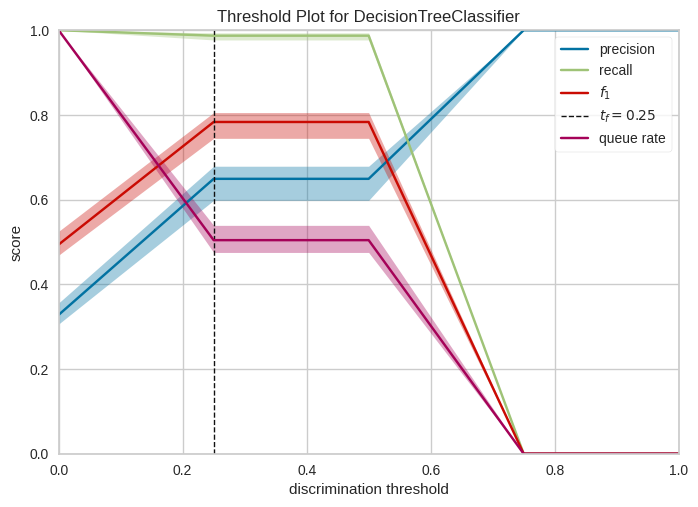

In [ ]:
getDiscriminationThreshold(classifier)

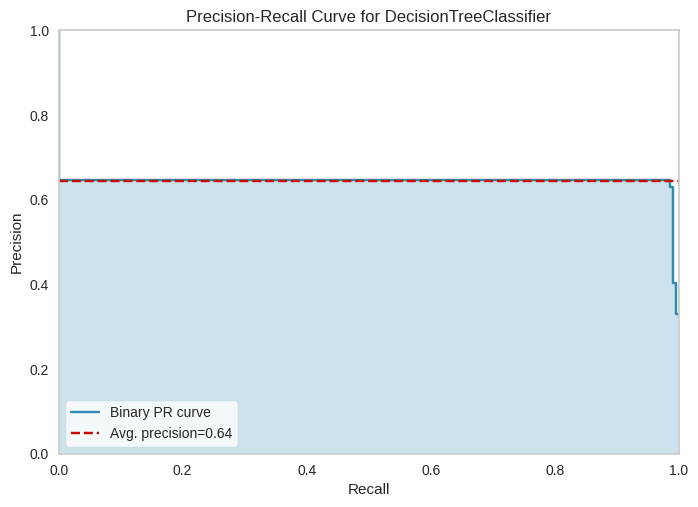

In [ ]:
getPrecisionRecall(classifier)

Average F1 score over 10-Folds: 0.922472


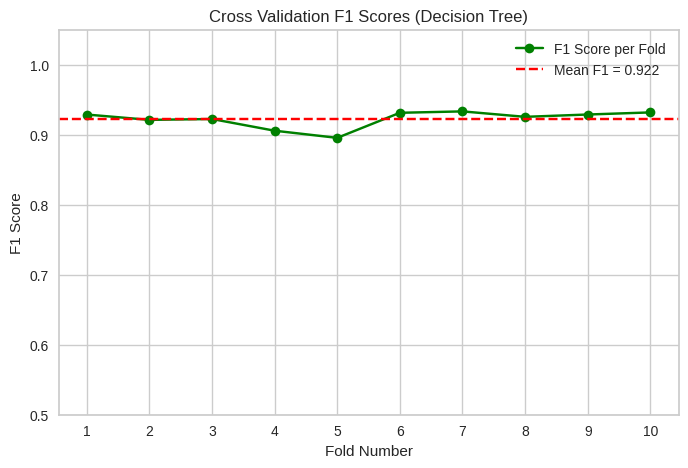

In [ ]:
# --- Import libraries ---
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, KFold
import matplotlib.pyplot as plt
import numpy as np

# --- Define Cross Validation Plot Function ---
def decisionTreeCrossValidationPlot(classifier, X, y, K=10):
    cv = KFold(n_splits=K, shuffle=True, random_state=42)
    f1_scores = cross_val_score(classifier, X, y, cv=cv, scoring='f1')

    print(f"Average F1 score over {K}-Folds: {np.mean(f1_scores):.6f}")

    # Plot
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, K+1), f1_scores, marker='o', linestyle='-', color='green', label='F1 Score per Fold')
    plt.axhline(y=np.mean(f1_scores), color='red', linestyle='--', label=f'Mean F1 = {np.mean(f1_scores):.3f}')
    plt.xticks(range(1, K+1))
    plt.ylim(0.5, 1.05)
    plt.xlabel('Fold Number')
    plt.ylabel('F1 Score')
    plt.title('Cross Validation F1 Scores (Decision Tree)')
    plt.legend()
    plt.grid(True)
    plt.show()

# --- Example Usage ---
classifier = DecisionTreeClassifier(
    max_depth=3,
    min_samples_split=20,
    min_samples_leaf=10,
    random_state=0
)

classifier.fit(X_train, y_train)

# Call the cross-validation plot function
decisionTreeCrossValidationPlot(classifier, X, y, K=10)


HYPERPARAMETER

In [ ]:
parameters = {
    "max_depth": [2, 3, 4, 5, 6, 7, 8],
    "min_samples_split": [2, 5, 10, 20],
    "min_samples_leaf": [1, 5, 10, 20],
    "criterion": ["gini", "entropy"]
}

scores = ["f1", "balanced_accuracy"]


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Base model
dt_model = DecisionTreeClassifier(random_state=0)

# Grid Search
classifier = GridSearchCV(
    estimator=dt_model,
    param_grid=parameters,
    scoring=scores,
    refit="f1",
    verbose=2,
    n_jobs=-1
)

# Fit GridSearchCV
classifier.fit(X_train, y_train)


Fitting 5 folds for each of 224 candidates, totalling 1120 fits


GridSearchCV(estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8],
                         'min_samples_leaf': [1, 5, 10, 20],
                         'min_samples_split': [2, 5, 10, 20]},
             refit='f1', scoring=['f1', 'balanced_accuracy'], verbose=2)

In [ ]:
# Best parameters and best score
print("Best Parameters:", classifier.best_params_)
print("Best F1 Score:", classifier.best_score_)


Best Parameters: {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 20, 'min_samples_split': 2}
Best F1 Score: 0.9741812530635219


F1 Score: 0.9805760214333556
Kappa Score: 0.9711840446128787
Accuracy Score: 0.9824972579209867
Confusion Matrix:
[[1529    5]
 [  24  732]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1534
           1       0.99      0.97      0.98       756

    accuracy                           0.99      2290
   macro avg       0.99      0.98      0.99      2290
weighted avg       0.99      0.99      0.99      2290



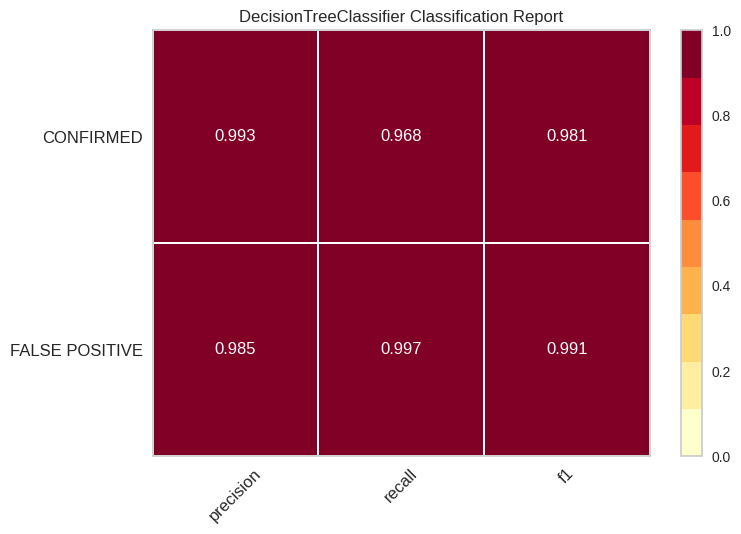

Average F1 score over 10-Folds: 0.975084


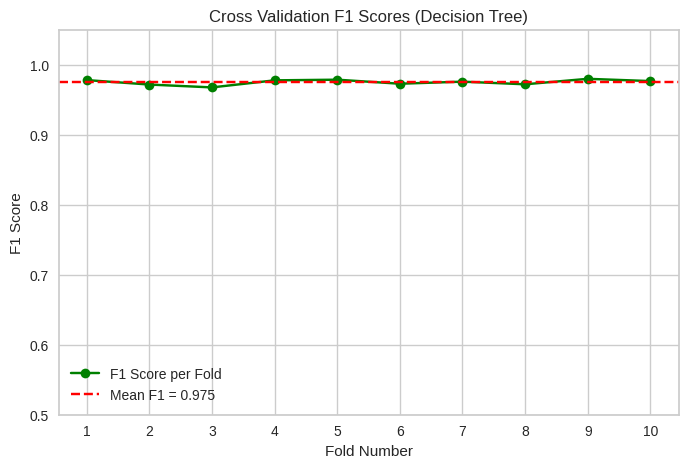

In [ ]:
import os
import joblib
best_dt = classifier.best_estimator_

pred = best_dt.predict(X_test)

performance(y_test, pred)

# Instead of calling `getClassificationReportHeatmap`,
# call `getClassificationReport` to print the classification report.
# If you want a visualization, look at the code of `getClassificationReport_kmeans`
# to see how it generates its heatmap.
getClassificationReport(best_dt) # Instead of `getClassificationReportHeatmap`

decisionTreeCrossValidationPlot(best_dt, X, y, K=10)

